# Regression

In [15]:
import numpy as np
import matplotlib as plt
import sklearn
import random
import pandas as pd
import seaborn as sns

### Simple data generation

In [159]:
X = np.linspace(0, 20.1, 200)
Y = X + 10

In [160]:
# Add some noise
Y = Y + np.random.normal(loc=0, scale=0.5, size=Y.shape[0])

<Axes: >

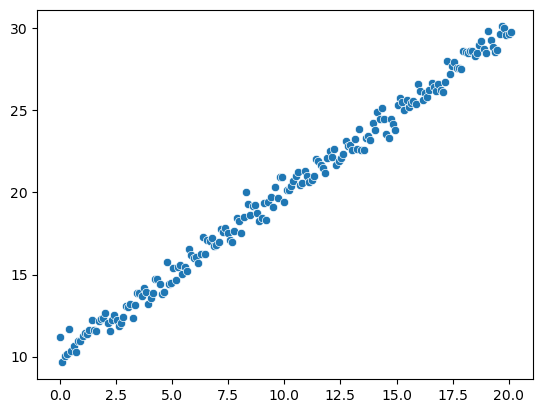

In [161]:
sns.scatterplot(x=X, y=Y)

### LinearRegression

#### 1. Analytical solution. Linear  dependence

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_0 = np.stack((np.ones(200),X), axis=1)

In [164]:
X_0.shape

(200, 2)

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X_0, Y, test_size=0.2, random_state=42)

In [166]:
class LinearRegression:
    def __init__(self,):
        self.w = None    
    def get_analytical_solution(self, X, Y):
        self.w = np.linalg.inv(X.T@ X) @ X.T @ Y
    
    def makePrediction(self, X):
        return self.w @ X.T 
    

In [167]:
regressor = LinearRegression()
regressor.get_analytical_solution(X_train, Y_train)

In [168]:
Y_pred = regressor.makePrediction(X_test)
Y_pred.shape

(40,)

In [169]:
def calculate_MSE_error(Y_true, Y_pred):
    return np.sum((Y_true - Y_pred) ** 2) / len(Y_true)

<Axes: >

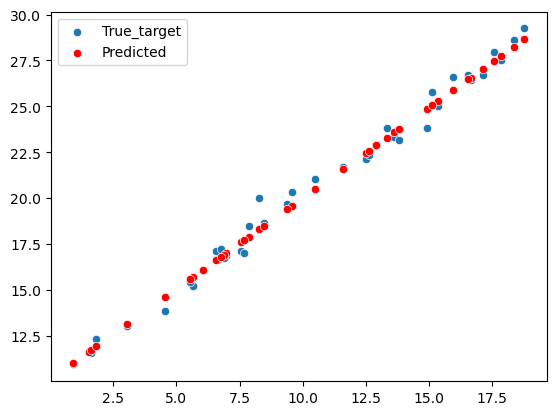

In [170]:
sns.scatterplot(x=X_test[:,1], y=Y_test, label='True_target')
sns.scatterplot(x=X_test[:,1], y=Y_pred, color='red', label='Predicted')

In [171]:
calculate_MSE_error(Y_pred, Y_test)

np.float64(0.26994238886150174)

#### 1. Analytical solution. Nonlinear  dependence

In [234]:
X = np.linspace(0, 20.1, 100)
Y = X ** 2 
X_0 = np.stack((np.ones(100), X), axis=1)

<Axes: >

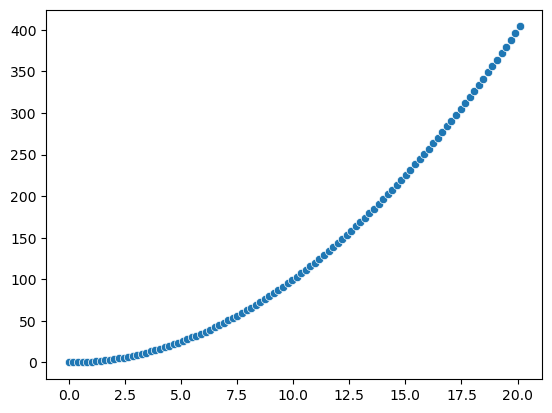

In [235]:
sns.scatterplot(x=X, y=Y)

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X_0, Y, test_size=0.2, random_state=42)

In [238]:
regressor2 = LinearRegression()
regressor.get_analytical_solution(X_train, Y_train)
print(regressor.w)

[-70.49380086  20.47947784]


In [204]:
Y_pred = regressor.makePrediction(X_test)
calculate_MSE_error(Y_pred, Y_test)

np.float64(835.797573425637)

<Axes: >

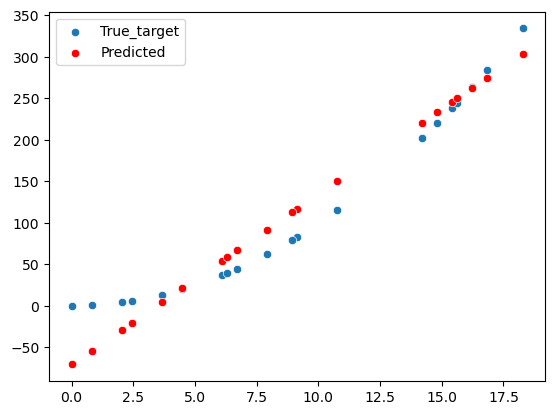

In [206]:
sns.scatterplot(x=X_test[:,1], y=Y_test, label='True_target')
sns.scatterplot(x=X_test[:,1], y=Y_pred, color='red', label='Predicted')

### 2. Gradient descent

In [224]:
class LinearRegressionSGD:
    def __init__(self, lr, epoch, bath, minLoss=None):
        self.w = None  
        self.lr = lr  
        self.epochs = epoch
        self.bath = bath
        self.errorHistory = []
        self.minLoss = minLoss
        
    def loss(self, Y_pred, Y_true):
        return np.sum((Y_pred - Y_true)**2) / Y_true.shape[0]
         
    def SGD(self, X, Y):
        self.w = np.ones(X.shape[1])
        self.amnt_bathes = len(X) // self.bath
        for epoch in range(self.epochs):
            cur_loss = 0
            for i in range(len(X)//self.amnt_bathes):
                bath_X, bath_Y = X[i:i + self.bath, :], Y[i:i+self.bath]
                grad = 2 / self.bath * bath_X.T @ (self.w@bath_X.T - bath_Y)
                self.w -= self.lr * grad
                cur_loss += self.loss(self.w @ bath_X.T, bath_Y)
            epochLoss = cur_loss / self.amnt_bathes
            self.errorHistory.append(epochLoss)
            if self.minLoss and epochLoss <= self.minLoss:
                break
    
    def makePrediction(self, X):
        return self.w @ X.T 
    

In [225]:
sgdRegressor = LinearRegressionSGD(0.001, 10, 5)

In [226]:
sgdRegressor.SGD(X_train,Y_train)

In [231]:
Y_pred = sgdRegressor.makePrediction(X_test)

In [232]:
calculate_MSE_error(Y_pred, Y_test)

np.float64(1572.2455743514688)

<Axes: >

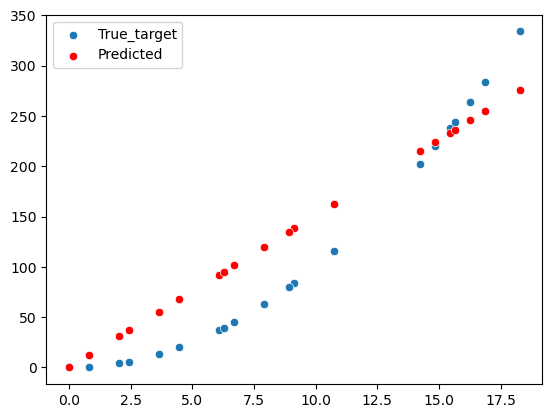

In [230]:
sns.scatterplot(x=X_test[:,1], y=Y_test, label='True_target')
sns.scatterplot(x=X_test[:,1], y=Y_pred, color='red', label='Predicted')